In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


2023-12-02 16:16:34.828062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel()

In [3]:
X_train[0,]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
y_train = y_train.reshape(-1, )
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

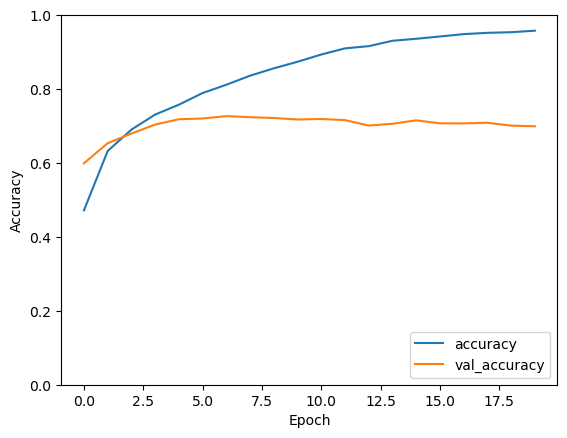

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define the CNN architecture
cnn = models.Sequential([
    # Convolutional layer with 32 filters, each of size 3x3, and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPooling layer to down-sample the spatial dimensions
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer with 64 filters, each of size 3x3, and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),
    # MaxPooling layer
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer with 64 filters, each of size 3x3, and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    # Flatten layer to flatten the output of the previous layer
    layers.Flatten(),
    
    # Dense (fully connected) layer with 64 neurons and ReLU activation
    layers.Dense(128, activation='relu'),
    
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
cnn.summary()

# Train the model
history = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot the training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

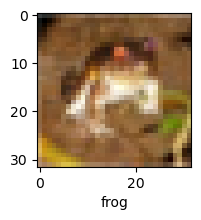

In [18]:
plot_sample(X_train, y_train, 0)

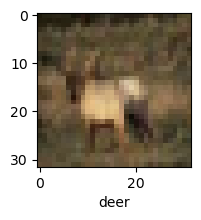

In [19]:
plot_sample(X_train, y_train, 3)

In [24]:
X_train = X_train[0]/255
X_test = X_test[0] /255